Missing values in Spotify:
 sent-by-spotify       0
sent-to-spotify    5046
dtype: int64
Missing values in AdobeCare:
 Tweet from AdobeCare       0
Tweet to AdobeCare      1163
dtype: int64
Missing values in CW1 Rubric:
 Unnamed: 0     4
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3     0
Unnamed: 4     0
Unnamed: 5     0
Unnamed: 6     0
Unnamed: 7     0
Unnamed: 8     0
Unnamed: 9     0
Unnamed: 10    0
dtype: int64
Missing values in Nvidia:
 Nvidia                                                             0
Interesting NVIDIA=ARM. nvidianews.nvidia.com/news/nvidia-to‚Ä¶    1
dtype: int64
First few rows of sentiment analysis results:
                                                 text  sentiment
0  @115887 Hmm. Can you try restarting your devic...  -0.155556
1  @SpotifyCares doesn‚Äôt work and i even tried ...   0.000000
2  @115887 Could you send us a DM with your accou...   0.000000
3  @SpotifyCares Premium &amp; when iÔ∏è have it ...   0.000000
4  @115887 Thanks. Just to be sure

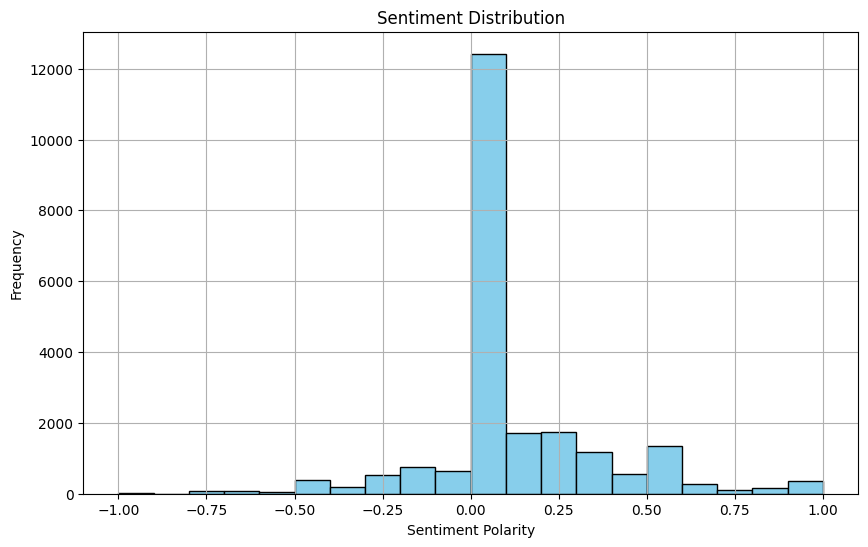

Missing values in Spotify:
 sent-by-spotify       0
sent-to-spotify    5046
dtype: int64
Missing values in AdobeCare:
 Tweet from AdobeCare       0
Tweet to AdobeCare      1163
dtype: int64
Missing values in CW1 Rubric:
 Unnamed: 0     4
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3     0
Unnamed: 4     0
Unnamed: 5     0
Unnamed: 6     0
Unnamed: 7     0
Unnamed: 8     0
Unnamed: 9     0
Unnamed: 10    0
dtype: int64
Missing values in Nvidia:
 Nvidia                                                             0
Interesting NVIDIA=ARM. nvidianews.nvidia.com/news/nvidia-to‚Ä¶    1
dtype: int64
First few rows of sentiment analysis results:
                                                 text  sentiment
0  @115887 Hmm. Can you try restarting your devic...  -0.155556
1  @SpotifyCares doesn‚Äôt work and i even tried ...   0.000000
2  @115887 Could you send us a DM with your accou...   0.000000
3  @SpotifyCares Premium &amp; when iÔ∏è have it ...   0.000000
4  @115887 Thanks. Just to be sure

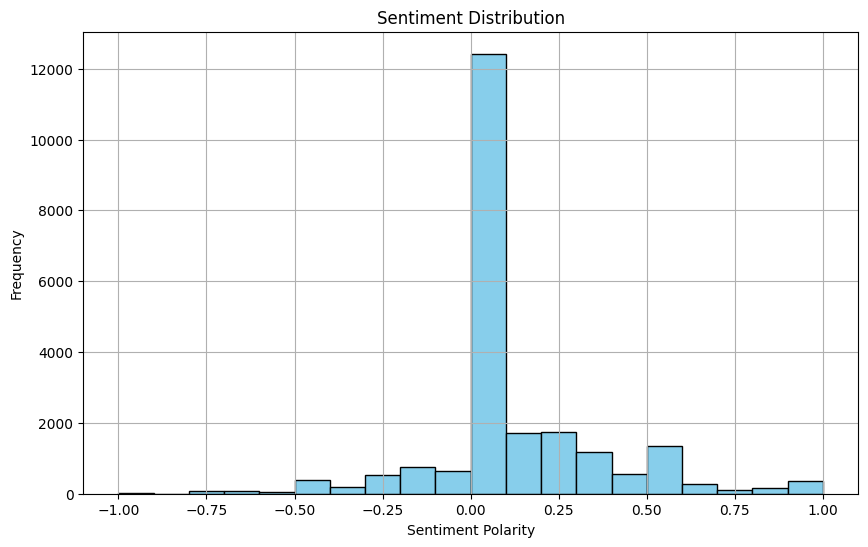

In [9]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Step 1: Load datasets
df_spotify = pd.read_excel('Spotify-Dataset.xlsx')
df_adobe = pd.read_csv('AdobeCare-Dataset.csv')
df_cw1_rubric = pd.read_excel('CW1-Rubric-2024.xlsx')
df_nvidia = pd.read_excel('Nvidia-Dataset.xlsx')

# Step 2: Check and display missing values for each dataset
print("Missing values in Spotify:\n", df_spotify.isnull().sum())
print("Missing values in AdobeCare:\n", df_adobe.isnull().sum())
print("Missing values in CW1 Rubric:\n", df_cw1_rubric.isnull().sum())
print("Missing values in Nvidia:\n", df_nvidia.isnull().sum())

# Step 3: Clean the data - Drop rows with missing values in text columns
df_spotify.dropna(subset=['sent-by-spotify', 'sent-to-spotify'], inplace=True)
df_adobe.dropna(subset=['Tweet from AdobeCare', 'Tweet to AdobeCare'], inplace=True)
df_nvidia.dropna(subset=['Nvidia'], inplace=True)

# Step 4: Combine text data for sentiment analysis
df_spotify_text = df_spotify[['sent-by-spotify', 'sent-to-spotify']].stack().reset_index(drop=True).to_frame(name='text')
df_adobe_text = df_adobe[['Tweet from AdobeCare', 'Tweet to AdobeCare']].stack().reset_index(drop=True).to_frame(name='text')
df_nvidia_text = df_nvidia[['Nvidia']].stack().reset_index(drop=True).to_frame(name='text')

# Concatenate all text data into a single DataFrame with one column named "text"
df_combined = pd.concat([df_spotify_text, df_adobe_text, df_nvidia_text], ignore_index=True)

# Step 5: Sentiment Analysis using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Calculate sentiment for each text entry
df_combined['sentiment'] = df_combined['text'].apply(get_sentiment)

# Step 6: Display and Save Results
print("First few rows of sentiment analysis results:\n", df_combined.head())
df_combined.to_csv('combined_sentiment_analysis.csv', index=False)
print("Sentiment analysis results saved to 'combined_sentiment_analysis.csv'.")

# Step 7: Plot Sentiment Distribution
plt.figure(figsize=(10, 6))
plt.hist(df_combined['sentiment'], bins=20, edgecolor='black', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Step 1: Load datasets
df_spotify = pd.read_excel('Spotify-Dataset.xlsx')
df_adobe = pd.read_csv('AdobeCare-Dataset.csv')
df_cw1_rubric = pd.read_excel('CW1-Rubric-2024.xlsx')
df_nvidia = pd.read_excel('Nvidia-Dataset.xlsx')

# Step 2: Check and display missing values for each dataset
print("Missing values in Spotify:\n", df_spotify.isnull().sum())
print("Missing values in AdobeCare:\n", df_adobe.isnull().sum())
print("Missing values in CW1 Rubric:\n", df_cw1_rubric.isnull().sum())
print("Missing values in Nvidia:\n", df_nvidia.isnull().sum())

# Step 3: Clean the data - Drop rows with missing values in text columns
df_spotify.dropna(subset=['sent-by-spotify', 'sent-to-spotify'], inplace=True)
df_adobe.dropna(subset=['Tweet from AdobeCare', 'Tweet to AdobeCare'], inplace=True)
df_nvidia.dropna(subset=['Nvidia'], inplace=True)

# Step 4: Combine text data for sentiment analysis
df_spotify_text = df_spotify[['sent-by-spotify', 'sent-to-spotify']].stack().reset_index(drop=True).to_frame(name='text')
df_adobe_text = df_adobe[['Tweet from AdobeCare', 'Tweet to AdobeCare']].stack().reset_index(drop=True).to_frame(name='text')
df_nvidia_text = df_nvidia[['Nvidia']].stack().reset_index(drop=True).to_frame(name='text')

# Concatenate all text data into a single DataFrame with one column named "text"
df_combined = pd.concat([df_spotify_text, df_adobe_text, df_nvidia_text], ignore_index=True)

# Step 5: Sentiment Analysis using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Calculate sentiment for each text entry
df_combined['sentiment'] = df_combined['text'].apply(get_sentiment)

# Step 6: Display and Save Results
print("First few rows of sentiment analysis results:\n", df_combined.head())
df_combined.to_csv('combined_sentiment_analysis.csv', index=False)
print("Sentiment analysis results saved to 'combined_sentiment_analysis.csv'.")

# Step 7: Plot Sentiment Distribution
plt.figure(figsize=(10, 6))
plt.hist(df_combined['sentiment'], bins=20, edgecolor='black', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
